<div style="border:solid green 2px; padding: 20px">
    
<b>Алиса, привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Анализ лояльности пользователей Яндекс Афиши

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
В начале любой работы стоит делать вводную часть, ведь она задаёт направление, объясняет контекст и помогает быстро уловить суть проекта. Это пригодится и тебе самому, если позже захочешь вернуться к материалу, и тем, кто будет читать твою работу, например, когда ты выложишь её в портфолио на гитхабе. Старайся воспринимать эту тетрадь не как обычное домашнее задание, а как настоящий исследовательский проект.
    
<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
    
Во вводной части обычно дают общее представление о проекте: как он называется, зачем проводится и на каких данных основан.  Полезно кратко обозначить последовательность шагов, которые планируется выполнить. По сути, задача этой части это сразу показать суть проекта    

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
# Импортируем библиотеки
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install phik

     |████████████████████████████████| 677 kB 1.4 MB/s eta 0:00:01


In [3]:
!pip install missingno

In [4]:
from phik import phik_matrix
import missingno as msno

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, что все импорты собраны в начале проекта

In [5]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название базы данных
             }

In [6]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

engine = create_engine(connection_string)

In [7]:
query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
--days_since_prev
-- Напишите ваш запрос ниже
select p.user_id, p.device_type_canonical, p.order_id, p.created_dt_msk as order_dt, p.created_ts_msk as order_ts, p.currency_code, p.revenue, p.tickets_count, EXTRACT(
        DAY FROM created_dt_msk
        - LAG(created_dt_msk) OVER (
            PARTITION BY user_id
            ORDER BY created_dt_msk)) AS days_since_prev, p.event_id, e.event_name_code as event_name, p.service_name, e.event_type_main, r.region_name, c.city_name
from afisha.purchases as p
left JOIN afisha.events as e on p.event_id=e.event_id
left join afisha.city as c on c.city_id=e.city_id
left join afisha.regions as r on r.region_id=c.region_id
WHERE (p.device_type_canonical in ('mobile', 'desktop')) and(e.event_type_main not in ('фильм'))
order by user_id
'''

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__


    

Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. 
    
Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```
    
<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
На гитхабе так нужно организовать обязательно, для принятия проекта.    

In [8]:
df = pd.read_sql(query, con=engine)

In [9]:
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк


In [10]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [11]:
# При необходимости добавляйте новые ячейки для кода или текста

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  event_type_main        290611 non-null  obje

Данные представлены в корректном формате, пропущенные значения есть только в столбце days_since_prev

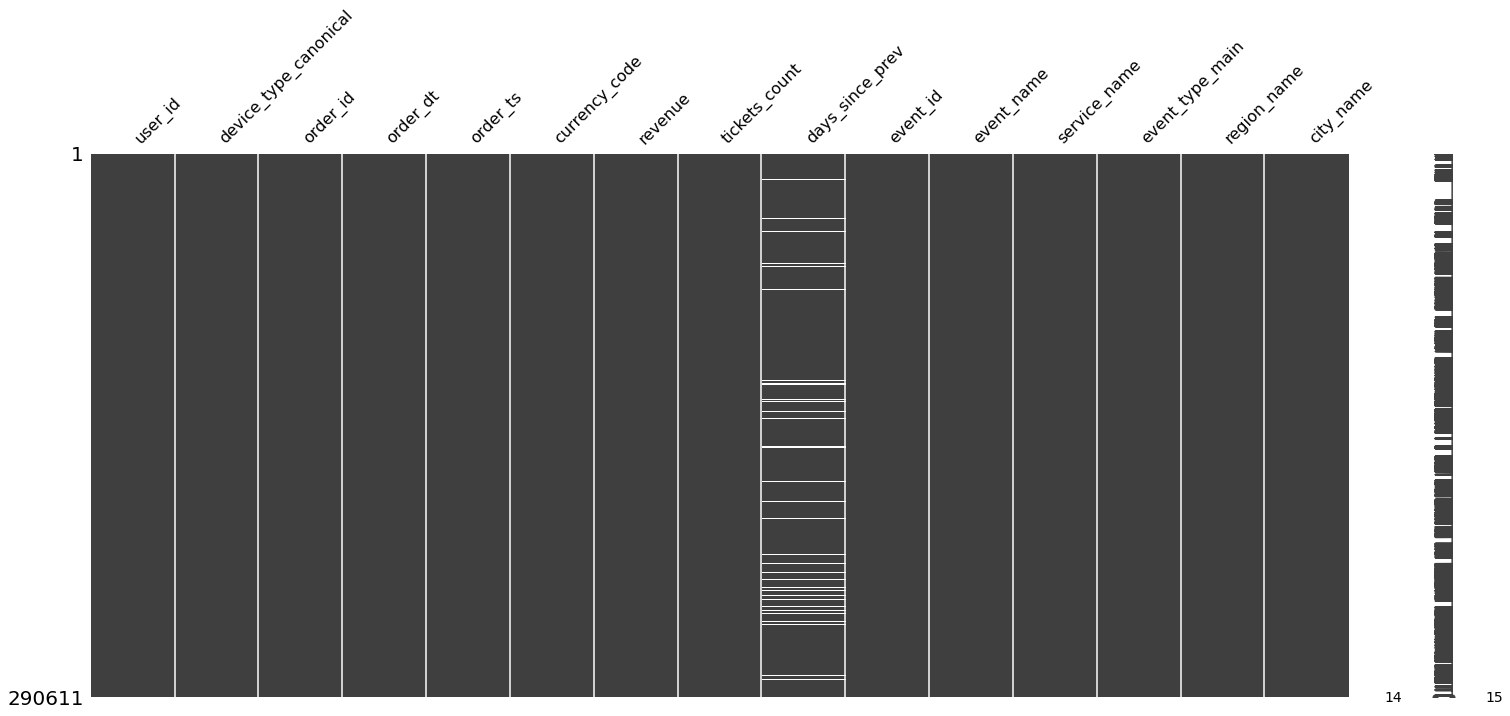

In [13]:
msno.matrix(df);

In [14]:
# считаем пропуски в данных
print(f'Абсолютное количество пропусков \n\n {df.isna().sum()}\n') 
print(f'Относительная доля (%) пропусков \n\n {round(df.isna().mean()*100, 2)}') 

Абсолютное количество пропусков 

 user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
dtype: int64

Относительная доля (%) пропусков 

 user_id                  0.00
device_type_canonical    0.00
order_id                 0.00
order_dt                 0.00
order_ts                 0.00
currency_code            0.00
revenue                  0.00
tickets_count            0.00
days_since_prev          7.55
event_id                 0.00
event_name               0.00
service_name             0.00
event_type_main          0.00
region_name              0.00
city_name                0.00


Пропущенные значения в столбце days_since_prev составляют около 8% данных, они распределены не систематично. В остальных столбцах пропущенных значений нет.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке данных. Здесь также можно было отметить, что нам потребуется выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и числовые столбцы на наличие аномалий и невалидных значений.
    
    
* Наличие пропусков в целом мы можем сейчас видеть и по результатам вывода `info`, они есть только в столбце `days_since_prev`. Вероятнее всего, это связано с тем, что данные записи относятся к первым покупкам клиентов.


    


</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [15]:
#данные по курсу валют
curr_exchange = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [16]:
curr_exchange

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


In [17]:
curr_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [18]:
curr_exchange['data'] = pd.to_datetime(curr_exchange['data'])

Для использования данных по курсу валют, необходимо привести дату к формату дат.

In [19]:
curr_exchange

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


In [20]:
# данные по курсу валют добавляем в основном датафрейм
df = pd.merge(df, curr_exchange[['data', 'curs']], left_on='order_dt', right_on='data', how='left')

In [21]:
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,data,curs
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск,2024-08-20,18.6972
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск,2024-07-23,18.3419
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск,2024-10-06,19.6475
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск,2024-07-13,18.5010
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк,2024-10-04,19.6648


In [22]:
df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [23]:
# пересчитываем выручку в рубли для тенге
df.loc[df['currency_code'] == 'kzt', 'revenue_rub'] = (df['revenue'] / 100 * df['curs'])
df.loc[df['currency_code'] == 'rub', 'revenue_rub'] = (df.loc[df['currency_code'] == 'rub', 'revenue'])

In [24]:
#проверяем датафрейм
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,data,curs,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск,2024-08-20,18.6972,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск,2024-07-23,18.3419,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск,2024-10-06,19.6475,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск,2024-07-13,18.5010,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк,2024-10-04,19.6648,1390.41


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
С шагом справились, результат корректный! Хорошо, что убеждаешься в этом.
</div>


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

* При подгрузке любых данных тоит сперва убедиться, что они корректны, данные о курсе не исключение. Тогда бы мы как раз могли обосновать, что требуется корректировка типа данных для даты. Сейчас по сути этот шаг берется из ниоткуда.

    
* Существует довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем применить его к столбцу и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```


* Не забываем фиксировать в выводах наши промежуточные наблюдения (например, что все прошло хорошо, теперь выручка скорректирована, и ее можно использовать для дальнейшего анализа).

</div>


---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [25]:
df.columns

Index(['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
       'currency_code', 'revenue', 'tickets_count', 'days_since_prev',
       'event_id', 'event_name', 'service_name', 'event_type_main',
       'region_name', 'city_name', 'data', 'curs', 'revenue_rub'],
      dtype='object')

#### Проверка столбцов с категориальными данными

Рассмотрим значения в категориальных столбцах, визуально оценим опечатки и возможные некорректные значения, оценив, веро ли прошла фильтрация в sql. 

In [26]:
df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

В device_type_canonical категории верные

In [27]:
df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

В currency_code категории верные

In [28]:
df['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

В service_name категории верные, неявных дубликатов/опечаток нет

In [29]:
df['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт',
       'ёлки'], dtype=object)

В event_type_main категории верные

In [30]:
sorted(df['region_name'].unique())

['Белоярская область',
 'Берестовский округ',
 'Берёзовская область',
 'Боровлянский край',
 'Верховинская область',
 'Верхозёрский край',
 'Верхоречная область',
 'Ветренский регион',
 'Вишнёвский край',
 'Глиногорская область',
 'Голубевский округ',
 'Горицветская область',
 'Горноземский регион',
 'Горностепной регион',
 'Дальнеземская область',
 'Дальнезорский край',
 'Дубравная область',
 'Залесский край',
 'Заречная область',
 'Зеленоградский округ',
 'Златопольский округ',
 'Золотоключевской край',
 'Зоринский регион',
 'Каменевский регион',
 'Каменичская область',
 'Каменноозёрный край',
 'Каменноярский край',
 'Каменополянский округ',
 'Ключеводский округ',
 'Кристаловская область',
 'Кристальная область',
 'Крутоводская область',
 'Крутоводский регион',
 'Лесноярский край',
 'Лесодальний край',
 'Лесополянская область',
 'Лесостепной край',
 'Лесоярская область',
 'Луговая область',
 'Лугоградская область',
 'Малиновая область',
 'Малиновоярский округ',
 'Медовская область',


В region_name данные выглядят корректными

In [31]:
#sorted(df['city_name'].unique())

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Тут я бы рекомендовал более тщательнее следить за чистотой данных, проверить категориальные признаки на предмет аномалий и сследить за распределением данных по признакам. Так можно сразу отловить категории с небольшим количеством данных
    
        # Анализ категориальных значений
        for column in ['columnname', 'columnname', 'columnname', 'columnname']:
        print(f"\nColumn: {column}")
        print("Unique values:", df[column].unique())
        print("Missing values count:", df[column].isna().sum())
        print("Value counts:")
        print(df[column].value_counts(dropna=False), "\n")    

#### Проверка числовых столбцов

In [32]:
df['tickets_count'].describe()

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

In [33]:
df['tickets_count'].unique()

array([ 4,  2,  3,  1,  5,  6, 10,  9,  7, 15, 13, 11,  8, 14, 12, 47, 27,
       17, 19, 57, 30, 37])

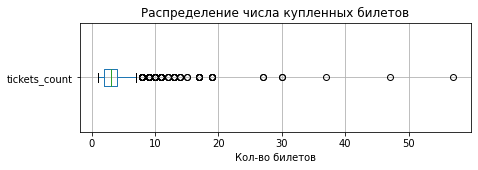

In [34]:
# распределение tickets_count
plt.figure(figsize=(7, 2))
df.boxplot(column='tickets_count', vert=False)
plt.title('Распределение числа купленных билетов')
plt.xlabel('Кол-во билетов')
plt.show()

В tickets_count данные выглядят корректными, невозможных значений нет. Есть несколько значений-выбросов, однако они являются, вероятно, корректными и включают покупку билетов на группу.

In [35]:
df['days_since_prev'].describe()

count    268678.000000
mean          3.222381
std          11.350509
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

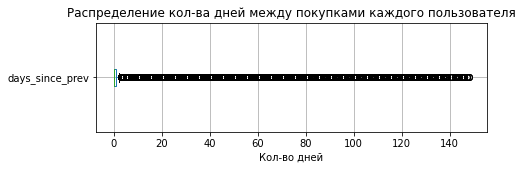

In [36]:
# распределение days_since_prev
plt.figure(figsize=(7, 2))
df.boxplot(column='days_since_prev', vert=False)
plt.title('Распределение кол-ва дней между покупками каждого пользователя')
plt.xlabel('Кол-во дней')
plt.show()

In [37]:
# функция для разделения days_since_prev на сегменты
def days_func(x):
    if x <=20:
        return '0-20 дней'
    elif 20 < x <= 40:
        return '20-40 дней'
    elif 40 < x <= 60:
        return '40-60 дней'
    elif 60 < x <= 80:
        return '60-80 дней'
    elif 80 < x <= 100:
        return '80-100 дней'
    elif 100 < x <= 120:
        return '100-120 дней'
    elif 120 < x <= 140:
        return '120-140 дней'
    elif 140 < x <= 160:
        return '140-160 дней'
    else:
        return 'неизвестно'

df['days_segments'] = df['days_since_prev'].apply(days_func)

Text(0.5, 1.0, 'Распределение кол-ва дней между покупками каждого пользователя')

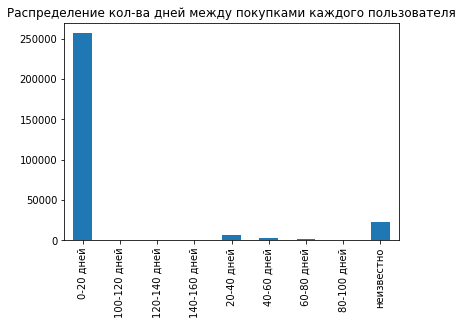

In [38]:
df['days_segments'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение кол-ва дней между покупками каждого пользователя')

Данные в столбце days_since_prev распределены в основном в сегменте до 20 дней

In [39]:
df['revenue_rub'].describe()

count    290611.000000
mean        555.571987
std         875.498172
min         -90.760000
25%         113.970000
50%         351.140000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

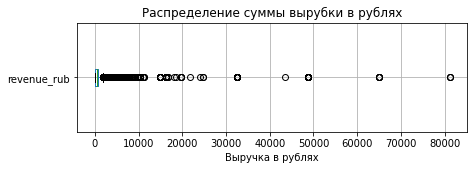

In [40]:
# распределение revenue_rub
plt.figure(figsize=(7, 2))
df.boxplot(column='revenue_rub', vert=False)
plt.title('Распределение суммы вырубки в рублях')
plt.xlabel('Выручка в рублях')
plt.show()

Данные по выручки содержат некорректные значения меньше 0, они будут удалены из датафрейма. Также данные по выручке будут тофильтрованы по 99 квантилю.

In [41]:
# фильтрация данных revenue больше нуля и по 99 квантилю
df_full = df.copy()
q99 = df['revenue_rub'].quantile(0.99)
df = df[df['revenue_rub'] <= q99]
df = df[df['revenue_rub'] >= 0]


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, отрицательные значения обработаны

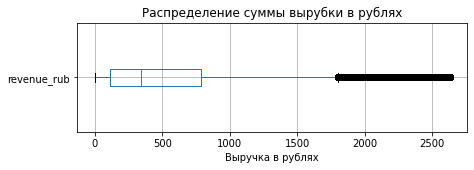

In [42]:
# распределение revenue_rub
plt.figure(figsize=(7, 2))
df.boxplot(column='revenue_rub', vert=False)
plt.title('Распределение суммы вырубки в рублях')
plt.xlabel('Выручка в рублях')
plt.show()

Основные данные распределены примерно до 800 рублей, но также присутвует некоторое кол-во заказов в сегменте 1700-2100 рублей.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

    
* Сейчас ты фиксируешь общие выводы только в конце раздела. Чтобы в работе был понятный сторителлинг, стоит также фиксировать промежуточные свои наблюдения для каждого из шагов: почему мы ничего не стали делать с пропусками и перешли к следующему шагу? Как приняли решение скорректировать тип у тех или иных столбцов? Действительно ли наши категориальные признаки в порядке и не требуют нормализации? Действительно ли в числовых признаках есть выбросы, какова их предполагаемая природа возникновения? Почему мы решили отбросить выбросы в выручке? Почему решили не отбрасывать выбросы в количестве билетов?

    
</div>
<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__


    

* В задании это не указывается, но по умолчанию важным шагом предварительного анализа и предобработки является проверка на наличие дубликатов, как полных, так и неполных (например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `id` и временем заказа). Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться.

    
    
* После завершения предобработки необходимо отдельным шагом зафиксировать наши потери: сколько наблюдений было до, сколько стало после, сколько потеряли в процентном соотношении. Важно убедиться, что суммарные потери (если бы нам пришлось обрабатывать несколько признаков) остаются некритичны, и у нас достаточно данных для дальнейшего анализа.
    
</div>

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [43]:
# сохраняем несортированую копию датасета и сортируем датасет по дате
df_unsorted = df.copy()
df = df.sort_values(by=['order_ts'])

In [44]:
df.columns

Index(['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
       'currency_code', 'revenue', 'tickets_count', 'days_since_prev',
       'event_id', 'event_name', 'service_name', 'event_type_main',
       'region_name', 'city_name', 'data', 'curs', 'revenue_rub',
       'days_segments'],
      dtype='object')

In [45]:
# формируем проифль пользователя с расчетом необходимых показателей
df_agg = (
    df.groupby('user_id')
      .agg(
          first_order_ts=('order_ts', 'min'),
          last_order_ts=('order_ts', 'max'),
          device_type=('device_type_canonical', 'first'),
          region=('region_name', 'first'),
          service=('service_name', 'first'),
          event_type=('event_type_main', 'first'),
          orders_cnt=('order_id', 'count'),
          avg_revenue=('revenue_rub', 'mean'),
          avg_tickets=('tickets_count', 'mean'),
          avg_days_since_prev=('days_since_prev', 'mean')
      )
).reset_index()

In [46]:
# визуально оцениваем профиль пользователя
df_agg.head()

,user_id,first_order_ts,last_order_ts,device_type,region,service,event_type,orders_cnt,avg_revenue,avg_tickets,avg_days_since_prev
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0


In [47]:
# создаем дополнительные бинарные переменные по заданию
df_agg['is_two'] = (df_agg['orders_cnt'] >= 2).astype(int)
df_agg['is_five'] = (df_agg['orders_cnt'] >= 5).astype(int)

In [48]:
df_agg.head(5)

,user_id,first_order_ts,last_order_ts,device_type,region,service,event_type,orders_cnt,avg_revenue,avg_tickets,avg_days_since_prev,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
    
* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.
    
    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.

    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

    ```python
    profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и тип мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )
    ```

    
</div>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [49]:
#общее число пользователей в выборке
print('общее число пользователей в профилях пользователя:', df_agg['user_id'].count())
print('число уникальных пользователей в изначальной выборке:', len(df_unsorted['user_id'].unique()))

общее число пользователей в профилях пользователя: 21838
число уникальных пользователей в изначальной выборке: 21838


In [50]:
# средняя выручка с одного заказа
print('средняя выручка с одного заказа:', round(df_agg['avg_revenue'].mean(),2))

средняя выручка с одного заказа: 545.03


In [51]:
# доля пользователей, совершивших два и более заказа
print('доля пользователей, совершивших два и более заказа:', round(df_agg['is_two'].sum()/df_agg['user_id'].count(), 2))

доля пользователей, совершивших два и более заказа: 0.62


In [52]:
# доля пользователей, совершивших пять и более заказов
print('доля пользователей, совершивших пять и более заказов:', round(df_agg['is_five'].sum()/df_agg['user_id'].count(), 2))

доля пользователей, совершивших пять и более заказов: 0.29


Рассчитанные по профилям пользователя показатели выглядят корректными и соответствуют данным из изначального датафрейма.

In [53]:
df_agg['orders_cnt'].describe()

count    21838.000000
mean        13.160775
std        121.577370
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10168.000000
Name: orders_cnt, dtype: float64

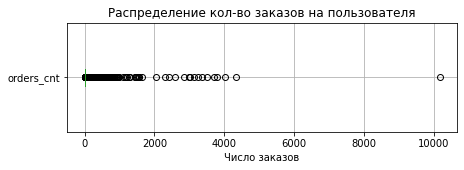

In [54]:
# распределение orders_cnt
plt.figure(figsize=(7, 2))
df_agg.boxplot(column='orders_cnt', vert=False)
plt.title('Распределение кол-во заказов на пользователя')
plt.xlabel('Число заказов')
plt.show()

Среднее число заказов на пользователя 13, при это есть немало значений выше тысячи заказов. Есть одно значение выше 10000 заказов. Имеет смысл отфильтровать кол-во заказов по 99 процентилю, чтобы анализировать типичное количество заказов без учета, вероятно, аномального значения выше 10000.



In [55]:
#  фильтруем по 99 процентилю кол-во заказов
df_agg_full = df_agg.copy()
q99 = df_agg['orders_cnt'].quantile(0.99)
df_agg = df_agg[df_agg['orders_cnt'] <= q99]

In [56]:
print('Доля сохраненных строк', round(len(df_agg)/len(df_agg_full),2))

Доля сохраненных строк 0.99


In [57]:
df_agg['avg_tickets'].describe()

count    21622.000000
mean         2.744256
std          0.917491
min          1.000000
25%          2.000000
50%          2.750000
75%          3.100000
max         11.000000
Name: avg_tickets, dtype: float64

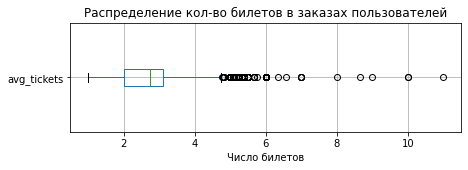

In [58]:
# распределение avg_tickets
plt.figure(figsize=(7, 2))
df_agg.boxplot(column='avg_tickets', vert=False)
plt.title('Распределение кол-во билетов в заказах пользователей')
plt.xlabel('Число билетов')
plt.show()

Среднее число билетов - около 3 билетов, при этом максимальное кол-во на пользователя - 11 билетов. Максимальное количество билетов выглядит реальным и корректным значением, поэтому фильтрация по этому показателю осуществляться не будет.

In [59]:
df_agg['avg_days_since_prev'].describe()

count    13295.000000
mean        16.097071
std         22.397847
min          0.000000
25%          1.333333
50%          8.375000
75%         20.750000
max        148.000000
Name: avg_days_since_prev, dtype: float64

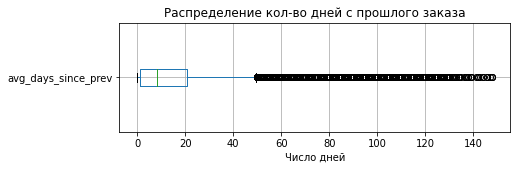

In [60]:
# распределение avg_days_since_prev
plt.figure(figsize=(7, 2))
df_agg.boxplot(column='avg_days_since_prev', vert=False)
plt.title('Распределение кол-во дней с прошлого заказа')
plt.xlabel('Число дней')
plt.show()

Среднее число дней между заказами - 16 дней, максимальное - 148 дней. Все значения выглядят корректными и не аномальными.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
Здесь  все супер, выполнены все необходимые шаги! 
    
    
Как рекомендация, было бы не лишним также проверить, насколько изменилась средняя выручка после удаления выбросов. Посмотреть на распределение данных с помощью гистограмм и диаграмм размаха.    
    
    
Так же, хорошо было бы лучше сначала обосновать выбор стратегии по обработке, а потом уже приступить к ее выполнению при необходимости.    

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [70]:
# функция для расчета сегментов пользователей
def segments(column):
    segments_table = (
        df_agg
        .groupby(column)
        .agg(users_cnt=('user_id', 'nunique'), users_is_two_cnt=('is_two', 'sum'))
        .reset_index()
        .sort_values(by='users_cnt', ascending=False)
    )

    segments_table['users_share_pct'] = (
        segments_table['users_cnt'] / segments_table['users_cnt'].sum() * 100
    ).round(2)
    segments_table['two_orders_share'] = round(segments_table['users_is_two_cnt']/(segments_table['users_cnt'].sum())*100)
    return segments_table


In [78]:
#функция для графика доли пользовательских сегментов
def bar_two_categories(df, title, xlabelx):
    df.plot(
               kind='bar',
               rot=45,
               legend=True,
               title=title,
                figsize=(15, 7)
    )
    plt.xlabel(xlabelx)
    plt.ylabel('Доля пользователей (в%)')
    plt.legend(['Доля всех пользователей', 'Доля пользователей с ≥ 2 заказами'])
    plt.grid()
    plt.show()

#### Распределение пользователей по типу их первого мероприятия

In [62]:
df_agg.columns

Index(['user_id', 'first_order_ts', 'last_order_ts', 'device_type', 'region',
       'service', 'event_type', 'orders_cnt', 'avg_revenue', 'avg_tickets',
       'avg_days_since_prev', 'is_two', 'is_five'],
      dtype='object')

In [63]:
event_type_segments = (segments('event_type'))

In [64]:
event_type_segments

,event_type,users_cnt,users_is_two_cnt,users_share_pct,two_orders_share
2,концерты,9564,5912,44.23,27.0
1,другое,5401,3217,24.98,15.0
5,театр,4245,2693,19.63,12.0
4,стендап,1110,676,5.13,3.0
3,спорт,794,443,3.67,2.0
0,выставки,413,265,1.91,1.0
6,ёлки,95,53,0.44,0.0


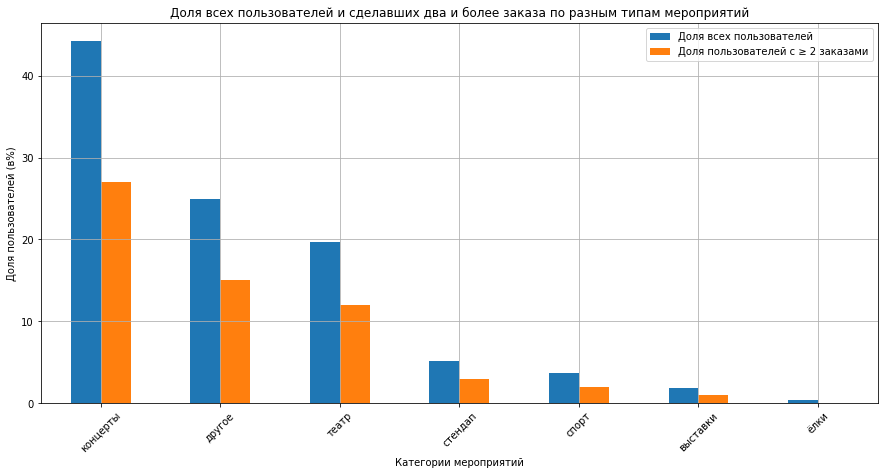

In [79]:
bar_two_categories(event_type_segments.set_index('event_type')[['users_share_pct', 'two_orders_share']], f'Доля всех пользователей и сделавших два и более заказа по разным типам мероприятий', 'Категории мероприятий')

Наиболее крупная категория первого мероприятия - концерты, их посещают почти 45% пользователей. Далее по популярности идут категория "других" мероприятий (около 25%) и категория театров (ок 20%). При этом среди этих же типов мероприятий доля повторных пользователей (с двумя и более заказами) наобольшая - 27%, 15% и 12% соответственно.

#### Распределение пользователей по типу использованного для заказа устройста

In [72]:
device_type_segments = segments('device_type')

In [73]:
device_type_segments

,device_type,users_cnt,users_is_two_cnt,users_share_pct,two_orders_share
1,mobile,17906,10887,82.81,50.0
0,desktop,3716,2372,17.19,11.0


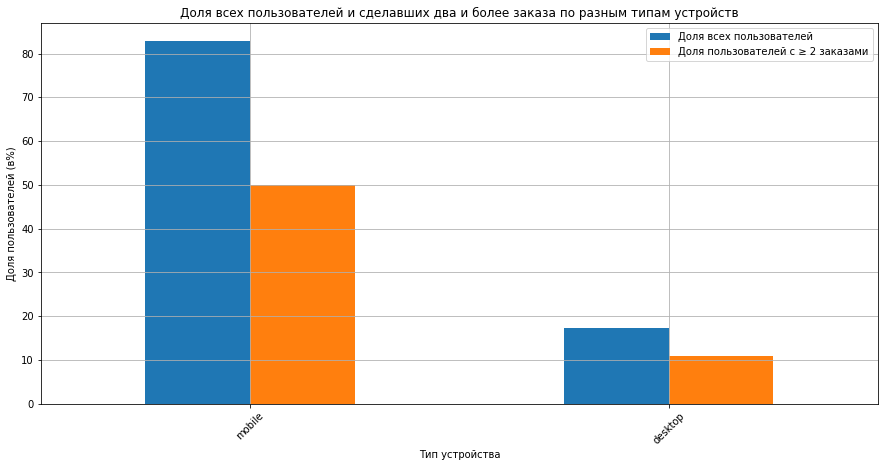

In [81]:
bar_two_categories(device_type_segments.set_index('device_type')[['users_share_pct', 'two_orders_share']], f'Доля всех пользователей и сделавших два и более заказа по разным типам устройств', 'Тип устройства')

Большинство пользователей осуществляет первый заказ в телефона (83%), с компьютера около 17%. При этом половина пользователей делают повторный заказ через мобильное устройство и 11% делают повторный заказ через компьютер.

#### Распределение пользователей по региону

In [74]:
region_segments = segments('region')

In [125]:
region_segments.head(10)

,region,users_cnt,users_is_two_cnt,users_share_pct,two_orders_share
23,Каменевский регион,7086,4421,32.77,20.0
60,Североярская область,3768,2405,17.43,11.0
77,Широковская область,1223,788,5.66,4.0
45,Озернинский край,675,373,3.12,2.0
41,Малиновоярский округ,526,294,2.43,1.0
76,Шанырский регион,502,338,2.32,2.0
74,Травяная область,488,300,2.26,1.0
57,Светополянский округ,457,300,2.11,1.0
52,Речиновская область,440,279,2.03,1.0
78,Яблоневская область,411,244,1.90,1.0


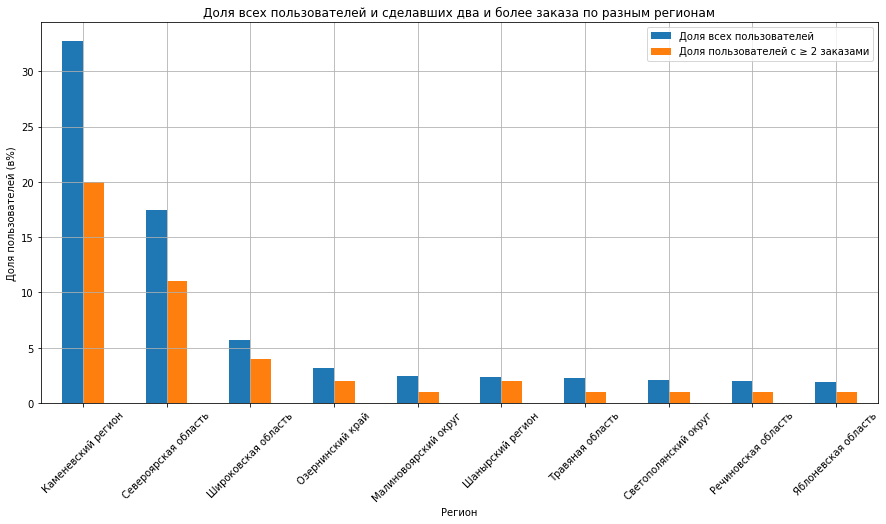

In [82]:
bar_two_categories(region_segments.head(10).set_index('region')[['users_share_pct', 'two_orders_share']], f'Доля всех пользователей и сделавших два и более заказа по разным регионам', 'Регион')

Наибольшее количество пользователей - из Каменевского региона (33%), и 17% из Североярской области. Далее в Топ 5 входят также Широковская область (6%), Озернинский край (3%) и Малиновоярский округ (2%). Остальные регионы из Топ-10 по кол-ву польователей имеют долю пользователей около 2%, оставшиеся регионы - менее 2%. 

#### Распределение пользователей по билетному оператору

In [76]:
service_segments = segments('service')

In [77]:
service_segments.head(10)

,service,users_cnt,users_is_two_cnt,users_share_pct,two_orders_share
3,Билеты без проблем,5167,3117,23.90,14.0
22,Мой билет,2970,1808,13.74,8.0
19,Лови билет!,2812,1714,13.01,8.0
4,Билеты в руки,2557,1605,11.83,7.0
23,Облачко,2177,1333,10.07,6.0
7,Весь в билетах,1286,809,5.95,4.0
20,Лучшие билеты,1182,725,5.47,3.0
24,Прачечная,583,365,2.70,2.0
17,Край билетов,454,296,2.10,1.0
12,Дом культуры,356,230,1.65,1.0


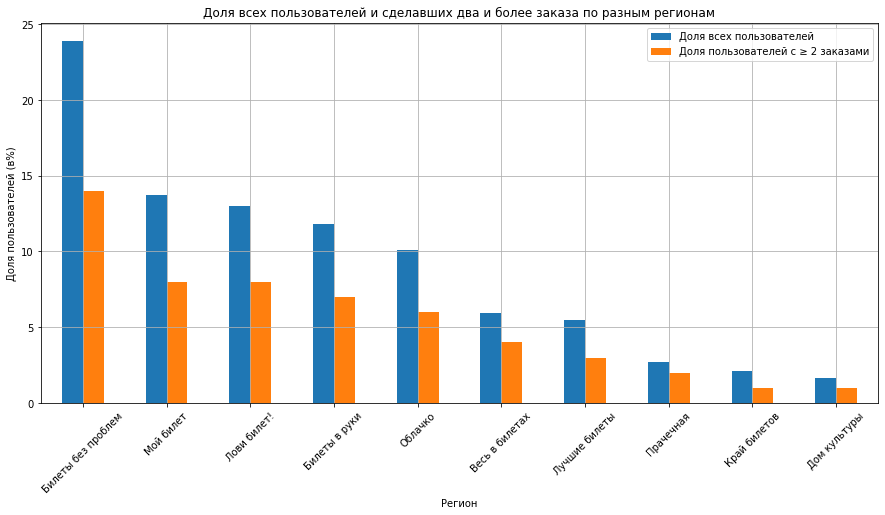

In [83]:
bar_two_categories(service_segments.head(10).set_index('service')[['users_share_pct', 'two_orders_share']], f'Доля всех пользователей и сделавших два и более заказа по разным регионам', 'Регион')

Топ-5 билетных оператаров - это Билеты без проблем (24% пользователей), Мой билет (14%), Лови билет! (13%), Билеты в руки (12%), Облачко (10%). Самый крупный оператор (Билеты без проблем) имеет самую высокую долю клиентов, которые повторно заказывают билеты (14%). У остальных из Топ-5 операторов этот процент составляет 6-8%. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


* По результатам все верно!
    
    
* Здорово, что создаешь пользовательскую функцию, чтобы не прописывать один и тот же код несколько раз!

</div>
<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
    
    
* Не хватает информативного названия подраздела и вступительного пояснения к шагу, почему мы решили проанализировать пользователей с точки зрения характеристик их первых заказов?
    

* Выводы немного суховаты. Было бы лучше не просто указать значения, а расставить акценты на том, как пользователи в целом распределены по сегментам, выстроить суждения о том, что преобладает, а что, наоборот, пользуется меньшим спросом, предположить почему, и лишь в подтверждение своих слов указать конкретные значения.
    
</div>

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

Гипотеза 1: Тип мероприятия, вероятно, влияет на вероятность возврата на Яндекс афишу, но сам тип мероприятия - не спортивное мероприятие. Чаще всего возвращаются пользователи, совершившие первый заказ на концерты.

Гипотеза 2: гипотеза в целом подтверждается данными: чем больше пользователей посещает мероприятие, тем больше из них совершает повторный заказ.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

По второй гипотезе можно сопоставить объем выборки с полученными результатом  

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


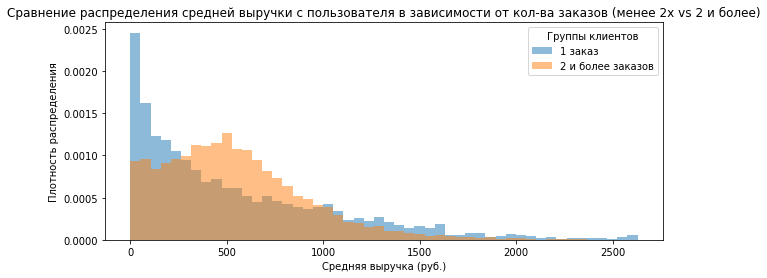

In [84]:
# Строим гистограмму распределения средней выручки с пользователя
plt.figure(figsize=(10, 4))

for i in [0,1]:
    df_agg.loc[df_agg['is_two'] == i, 'avg_revenue'].plot(
        kind='hist',
        bins=50,
        alpha=0.5,
        density=True,
        label=f'{i}',
        legend=True
    )

plt.title(f'Сравнение распределения средней выручки с пользователя в зависимости от кол-ва заказов (менее 2х vs 2 и более)')
plt.xlabel('Средняя выручка (руб.)')
plt.ylabel('Плотность распределения')
plt.legend(title='Группы клиентов', labels=['1 заказ', '2 и более заказов'])

plt.show()

Диапазон среднего размера выручки различен для пользователей с одним заказом и для пользователей с 2мя и более заказами. Пользователи с одним заказом стремятся купить наиболее дешевые билеты - тем дороже билет, тем меньше пользователей его купят. Среди пользователей с двумя и больше заказов большинство делают заказ на 500 рублей.

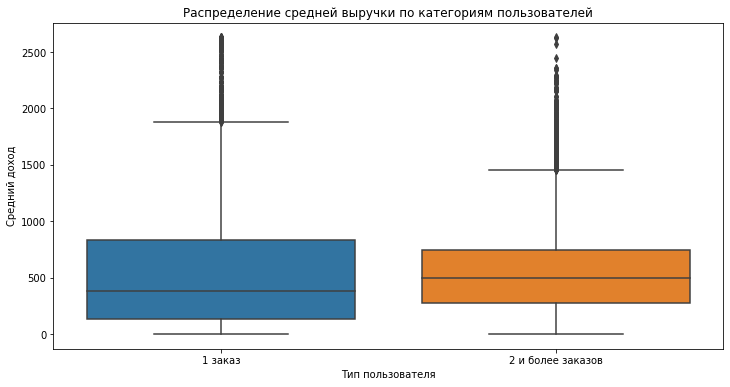

In [85]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    x='is_two',
    y='avg_revenue',
    data=df_agg
)

ax.set_xlabel('Тип пользователя')
ax.set_ylabel('Средний доход')
ax.set_xticklabels(['1 заказ', '2 и более заказов'])
plt.title('Распределение средней выручки по категориям пользователей')
plt.show()


На графике боксплот видна аналогичная тенденция - в среднем от повторных пользователей в среднем выручка выше.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Можно чуть структурировать интерпретацию. Начни с общего сравнения (чем отличаются группы в целом), затем подчеркни ключевые различия в диапазонах (например, что возвращающиеся чаще в зоне от...–до... ₽, а однократные имеют больший разброс), и завершай возможными причинами — например, что нулевая выручка у однократных, вероятно, связана с возвратами, а крупные заказы — с разовыми покупками для групп.
    
Еще можно добавить расчёты медины и среднего, чтобы понимать - имеется ли смещение и в какую сторону    

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [86]:
#df_agg

In [87]:
df_agg['two_vs_five'] = np.where(df_agg['is_five'] == 1, 1,
                         np.where((df_agg['is_five'] == 0) & (df_agg['is_two'] == 1), 0, np.nan))

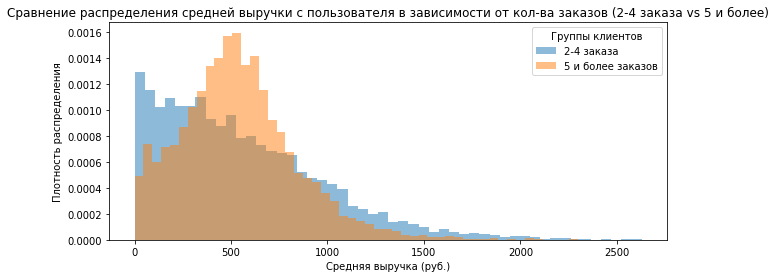

In [88]:
# Строим гистограмму распределения средней выручки с пользователя
plt.figure(figsize=(10, 4))

for i in [0,1]:
    df_agg.loc[df_agg['two_vs_five'] == i, 'avg_revenue'].plot(
        kind='hist',
        bins=50,
        alpha=0.5,
        density=True,
        label=f'{i}',
        legend=True
    )

plt.title(f'Сравнение распределения средней выручки с пользователя в зависимости от кол-ва заказов (2-4 заказа vs 5 и более)')
plt.xlabel('Средняя выручка (руб.)')
plt.ylabel('Плотность распределения')
plt.legend(title='Группы клиентов', labels=['2-4 заказа', '5 и более заказов'])

plt.show()

Пользователи совершившие 2-4 заказа в среднем приносят меньшую среднюю выручку, чем бользователи с 5 и более заказами.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
* С этой задачей тоже справились! 
    
 
* Плюс за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`). По выводам тоже все верно подмечено!
 
</div>
<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
    



    
* Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого сегмента.

</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [90]:
def segment_tickets(x):
    if x <= 2:
        return 'от 1 до 2 билетов'
    elif 2 < x <= 3:
        return 'от 2 до 3 билетов'
    elif 3 < x <= 5:
        return 'от 3 до 5 билетов'
    elif 5 < x:
        return 'от 5 и более билетов'
    else:
        return 'неизвестно'

df_agg['tickets_segments'] = df_agg['avg_tickets'].apply(segment_tickets)


In [91]:
segment_tickets = (segments('tickets_segments'))

In [92]:
segment_tickets

,tickets_segments,users_cnt,users_is_two_cnt,users_share_pct,two_orders_share
1,от 2 до 3 билетов,9922,7368,45.89,34.0
0,от 1 до 2 билетов,6150,2467,28.44,11.0
2,от 3 до 5 билетов,5356,3361,24.77,16.0
3,от 5 и более билетов,194,63,0.90,0.0


Почти половина пользователей (46%) приобрела в среднем от 2 до 3 билетов, 28% - 1-2 билета и 25% - 3-5 билетов. Больше пяти билетов приобреала незначительная доля пользователей, меньше процента. При этом среди сегментов пользователей по кол-ву приобретенных билетов наибольшая доля повторных пользователей была срдеи тех, кто приоретал в среднем 2-3 билета (34%).

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно чуть развить вывод — предположить, почему пользователи, покупающие 2–3 билета, возвращаются чаще. Например, это могут быть небольшие компании или семьи, которые чаще ходят на мероприятия вместе, а значит, лояльность у них выше. А вот пользователи с 5+ билетами, вероятно, совершают разовые групповые покупки (например, для организации или класса), поэтому возвращаются реже

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [93]:
# день недели первой покупки
df_agg['day_of_week'] = df_agg['first_order_ts'].dt.day_name()

In [94]:
# время с момента первой покупки — лайфтайм
df_agg['user_lifetime'] = df_agg['last_order_ts'] - df_agg['first_order_ts']

In [95]:
df_agg.head()

,user_id,first_order_ts,last_order_ts,device_type,region,service,event_type,orders_cnt,avg_revenue,avg_tickets,avg_days_since_prev,is_two,is_five,two_vs_five,tickets_segments,day_of_week,user_lifetime
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Tuesday,0 days 00:00:00
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0,0.0,от 2 до 3 билетов,Tuesday,74 days 19:19:38
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0,0.0,от 2 до 3 билетов,Saturday,101 days 19:31:12
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Thursday,0 days 00:00:00
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0,0.0,от 1 до 2 билетов,Sunday,15 days 14:49:52


In [100]:
print('Средний интервал между покупками пользователей с повторными заказами - ', df_agg[df_agg['orders_cnt'] !=0]['user_lifetime'].mean().days, 'дней')

Средний интервал между покупками пользователей с повторными заказами -  38 дней


In [103]:
#пользователи с повторными заказами (бинарный признак)
df_agg['user_back'] = np.where(df_agg['orders_cnt'] == 1, 0, np.where((df_agg['orders_cnt'] > 1), 1, np.nan))

In [104]:
df_agg.head()

,user_id,first_order_ts,last_order_ts,device_type,region,service,event_type,orders_cnt,avg_revenue,avg_tickets,avg_days_since_prev,is_two,is_five,two_vs_five,tickets_segments,day_of_week,user_lifetime,user_back
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Tuesday,0 days 00:00:00,0.0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0,0.0,от 2 до 3 билетов,Tuesday,74 days 19:19:38,1.0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0,0.0,от 2 до 3 билетов,Saturday,101 days 19:31:12,1.0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Thursday,0 days 00:00:00,0.0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0,0.0,от 1 до 2 билетов,Sunday,15 days 14:49:52,1.0


In [106]:
# сегменты пользователей по дня недели
days_segments = df_agg.groupby('day_of_week').agg(user_cnt = ('user_id', 'count'), user_back_count = ('user_back', 'sum')).reset_index().sort_values(by='user_cnt', ascending=False)
days_segments['users_share_pct'] = (days_segments['user_cnt'] / days_segments['user_cnt'].sum() * 100).round(2)
days_segments['users_back_share_pct'] = (days_segments['user_back_count'] / days_segments['user_cnt'].sum() * 100).round(2)

In [107]:
days_segments

,day_of_week,user_cnt,user_back_count,users_share_pct,users_back_share_pct
2,Saturday,3323,2086.0,15.37,9.65
0,Friday,3256,1946.0,15.06,9.00
5,Tuesday,3175,1965.0,14.68,9.09
4,Thursday,3112,1850.0,14.39,8.56
6,Wednesday,3061,1906.0,14.16,8.82
1,Monday,2918,1838.0,13.50,8.50
3,Sunday,2777,1668.0,12.84,7.71


Распределение пользователей в зависимости от дня недели, в который была совершена покупка, довольно равномерно и доля пользователей приобретающих билеты во все дни недели, кроме вскр, составляет 14-15%. Воскресенье самый непопулярный день для покупки билетов, но разница мала - 13% пользователей приобретает билеты в вскр. Суббота самый популярный день - 15.37% пользователей приобретают билеты. При этом доля повторных заказов от пользователей также примерно одинакова и не зависит сильно от дня недели - составляет 9.65% для субботы (максимальный показатель среди дней недели) и 7.71% для воскресенья (минимальный показатель).

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Когда планируют досуг, но возвращаемость остаётся примерно одинаковой — это говорит о том, что день недели первой покупки не влияет на лояльность, а повторное использование сервиса определяется скорее качеством опыта и интересом к мероприятиям

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [89]:
# среднее время между заказами для пользователей с 2-4 заказами vs 5 и более
df_agg.groupby('two_vs_five').agg({'avg_days_since_prev':'mean'}).reset_index()

,two_vs_five,avg_days_since_prev
0,0.0,21.328678
1,1.0,9.906772


In [108]:
# среднее время между заказами для разовых пользователей и возвращающихся
df_agg.groupby('user_back').agg({'avg_days_since_prev':'mean'}).reset_index()

,user_back,avg_days_since_prev
0,0.0,29.722222
1,1.0,16.060077


Среди пользователей, совершивших 2-4 заказа, средний интервал между заказами - 21 день, а среди пользователей, совершивших 5 и более заказов - 10 дней. Чем меньше интервал между заказами, тем ольше вероятность возвращения пользователя для нового заказа.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
<b>Отлично ✅:</b> По расчетам все верно!
    
</div>
<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

<b>Рекомендации💡:</b>  Важно иметь в виду, что среднее значение довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основаня масса значений будет гораздо ниже. Поэтому здесь важно было бы построить в том числе гистограммы, наложить их друг на друга (как мы это делали при сравнении выручки), чтобы видеть всю картину в данных.
 
</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [109]:
df_agg.columns

Index(['user_id', 'first_order_ts', 'last_order_ts', 'device_type', 'region',
       'service', 'event_type', 'orders_cnt', 'avg_revenue', 'avg_tickets',
       'avg_days_since_prev', 'is_two', 'is_five', 'two_vs_five',
       'tickets_segments', 'day_of_week', 'user_lifetime', 'user_back'],
      dtype='object')

In [110]:
def segment_orders(x):
    if x == 1:
        return '1 заказ'
    elif 2 <= x <= 4:
        return 'от 2 до 4 заказов'
    elif x >= 5:
        return 'от 5 заказов и выше'
    else:
        return 'неизвестно'

df_agg['orders_segments'] = df_agg['orders_cnt'].apply(segment_orders)


In [114]:
df_agg['user_lifetime_days'] = df_agg['user_lifetime'] / pd.Timedelta(days=1)
df_agg.head()


,user_id,first_order_ts,last_order_ts,device_type,region,service,event_type,orders_cnt,avg_revenue,avg_tickets,avg_days_since_prev,is_two,is_five,two_vs_five,tickets_segments,day_of_week,user_lifetime,user_back,orders_segments,user_lifetime_days
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Tuesday,0 days 00:00:00,0.0,1 заказ,0.000000
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0,0.0,от 2 до 3 билетов,Tuesday,74 days 19:19:38,1.0,от 2 до 4 заказов,74.805301
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0,0.0,от 2 до 3 билетов,Saturday,101 days 19:31:12,1.0,от 2 до 4 заказов,101.813333
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0,NaN,от 3 до 5 билетов,Thursday,0 days 00:00:00,0.0,1 заказ,0.000000
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0,0.0,от 1 до 2 билетов,Sunday,15 days 14:49:52,1.0,от 2 до 4 заказов,15.617963


In [115]:

interval_cols = ['orders_cnt', 'avg_days_since_prev', 'avg_revenue', 'avg_tickets', 'user_lifetime_days', 'avg_days_since_prev']
# add 'user_lifetime',
phik_matrix = df_agg[['device_type', 'region', 'service', 'event_type', 'orders_cnt', 'avg_revenue', 'avg_tickets',
       'avg_days_since_prev', 'is_two', 'is_five', 'day_of_week', 'user_back', 'orders_segments', 'user_lifetime_days']].phik_matrix(interval_cols=interval_cols)

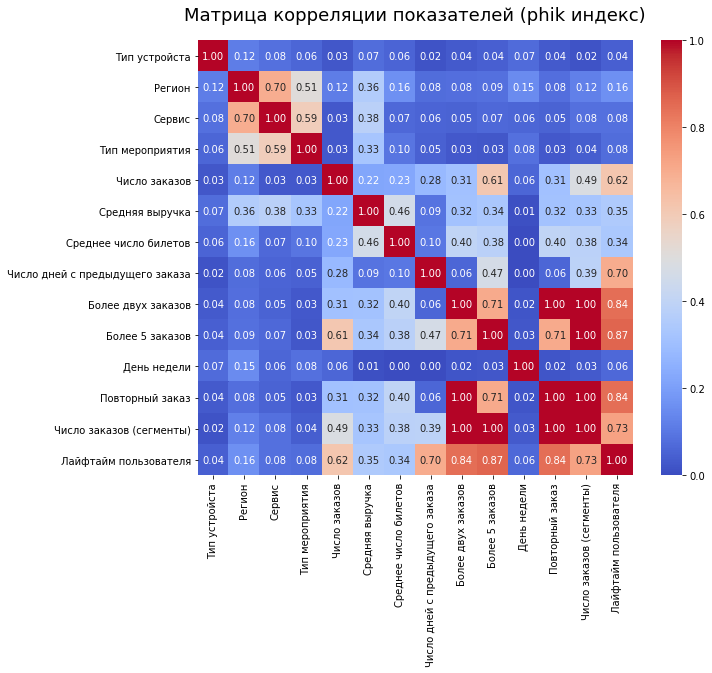

In [117]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(phik_matrix,annot=True,fmt='.2f',cmap='coolwarm',square=True)
ax.set_xticklabels(['Тип устройста', 'Регион', 'Сервис', 'Тип мероприятия', 'Число заказов', 'Средняя выручка', 'Среднее число билетов', 'Число дней с предыдущего заказа', 'Более двух заказов', 'Более 5 заказов', 'День недели', 'Повторный заказ', 'Число заказов (сегменты)', 'Лайфтайм пользователя'])
ax.set_yticklabels(['Тип устройста', 'Регион', 'Сервис', 'Тип мероприятия', 'Число заказов', 'Средняя выручка', 'Среднее число билетов', 'Число дней с предыдущего заказа', 'Более двух заказов', 'Более 5 заказов', 'День недели', 'Повторный заказ', 'Число заказов (сегменты)', 'Лайфтайм пользователя'])
plt.title('Матрица корреляции показателей (phik индекс)', fontsize=18, pad=20)
plt.show()

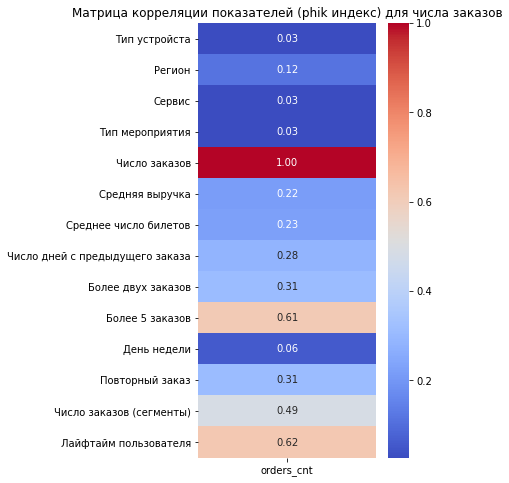

In [123]:
orders_corr = phik_matrix[['orders_cnt']]

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    orders_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=False
)
ax.set_yticklabels(['Тип устройста', 'Регион', 'Сервис', 'Тип мероприятия', 'Число заказов', 'Средняя выручка', 'Среднее число билетов', 'Число дней с предыдущего заказа', 'Более двух заказов', 'Более 5 заказов', 'День недели', 'Повторный заказ', 'Число заказов (сегменты)', 'Лайфтайм пользователя'])
plt.title('Матрица корреляции показателей (phik индекс) для числа заказов')
plt.show()

По матрице корреляции phik видно, что сильнее всего наблюдается связь (помимо показателей сформированных из числа заказов, напр бинарный показатель более 5 заказов и проч) между числом заказов и лайфтаймом пользователя (=0.62). Умеренная связь наьблюдается между числом заказов и средней выручкой и средним числом билетов ().22 и 0.23 соответственно).

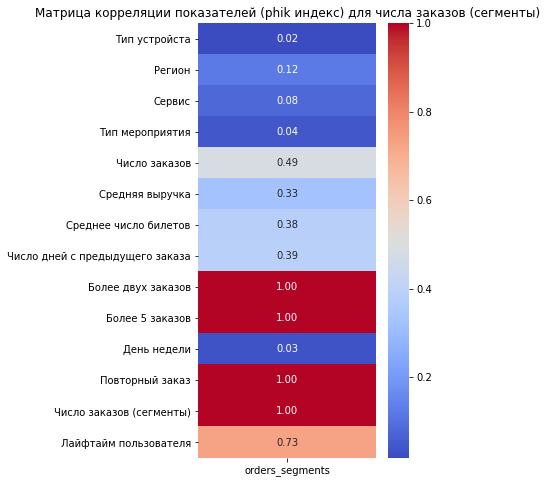

In [124]:
orders_corr = phik_matrix[['orders_segments']]

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    orders_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=False
)
ax.set_yticklabels(['Тип устройста', 'Регион', 'Сервис', 'Тип мероприятия', 'Число заказов', 'Средняя выручка', 'Среднее число билетов', 'Число дней с предыдущего заказа', 'Более двух заказов', 'Более 5 заказов', 'День недели', 'Повторный заказ', 'Число заказов (сегменты)', 'Лайфтайм пользователя'])
plt.title('Матрица корреляции показателей (phik индекс) для числа заказов (сегменты)')
plt.show()


Сегментированный показатель числа заказов (1, 2-4, 5 и выше) умеренно связан со средней выручкой (0.33), средним числом билетов (0.38) и числом дней с предыдущего заказа (0.39). Наиболее сильная связь наблюдается с лайфтаймом пользователя (0.73)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
С этим заданием тоже справились!

</div>
<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


    
* В выводах Было бы неплохо сделать более явный акцент на том, что поведение клиентов во времени и количество билетов важнее для объяснения повторных покупок, чем их демография или первый выбор сервиса.


### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

#### Данные и их подготовка

В работе использовалась выгрузка заказов пользователей билетного сервиса. В датасет вошли данные о пользователях, заказах, выручке, количестве билетов, типе устройства, мероприятии, регионе и временных характеристиках.

В процессе подготовки данных:

- Пропуски в days_since_prev (~8%) признаны допустимыми (характерны для пользователей с одной покупкой).

- Выручка была приведена к единой валюте (тенге → рубли).

- Удалены заказы с некорректной выручкой (< 0).

- Применена фильтрация выбросов по выручке (99-й перцентиль).

- Обнаружен экстремальный выброс по числу заказов (более 10 000) — выполнена фильтрация по 99-му перцентилю для анализа типичного поведения.

- Категориальные признаки проверены — некорректных значений и скрытых дубликатов не выявлено.

После подготовки данных построен профиль пользователя (21838 уникальных пользователей — совпадает с исходной выборкой).

#### Основные результаты анализа
Общие показатели

- Всего пользователей: 21 838

- Средняя выручка с заказа: 545 руб.

- Доля пользователей с ≥2 заказами: 62%; с ≥5 заказами: 29%

- Среднее число заказов на пользователя: 13 (с выбросами)

- Среднее число билетов в заказе: ≈3

- Средний интервал между заказами: 16 дней

Данные достаточны по объёму, структура стабильная, аномалии точечные и обработаны.

#### Влияние характеристик первого заказа на возврат
- Тип мероприятия: самая крупная категория — концерты (≈45%). Именно пользователи концертов чаще возвращаются. Гипотеза о спортивных мероприятиях не подтвердилась. Концерты — ключевая «точка входа».

- Тип устройства: 83% первый заказ — мобильные устройства. Повторные покупки также преимущественно с мобильных. Мобильные устройства — основной канал привлечения и удержания.

- Регион: наибольшая доля пользователей из Каменевского региона (33%), и 17% из Североярской области. Более активные регионы демонстрируют более высокую долю повторных заказов; гипотеза 2 в целом подтверждается

- Билетный оператор: 73% пользователей приобретают билеты через топ-5 операторов: Билеты без проблем (24% пользователей), Мой билет (14%), Лови билет! (13%), Билеты в руки (12%), Облачко (10%). Топ-операторы дают бОльшую долю возвратов. Крупнейший оператор — самая высокая доля повторных покупок (14%).

#### Средняя выручка и повторные покупки

- Пользователи с ≥2 заказами имеют более высокую среднюю выручку

- Пользователи с 5+ заказами приносят больше выручки, чем 2–4 заказа

- Повторные пользователи концентрируются в сегменте ~500 руб.

Более дорогие заказы связаны с большей вероятностью возврата.

#### Количество билетов и возврат

Самая высокая доля повторных покупок — у сегмента 2–3 билета (46%).

#### Временные характеристики

- Покупки в зависимости от дня недели - различия минимальны. День недели не оказывает существенного влияния на retention.

- Интервал между покупками: 2–4 заказа ~21 день; 5+ заказов ~10 дней

Чем меньше интервал, тем выше вероятность дальнейшего возврата.

#### Корреляционный анализ (phi_k)

Наиболее связаны с числом заказов:

- лайфтайм пользователя (0.62–0.73) — сильная связь

- средняя выручка (0.22–0.33), среднее число билетов (0.23–0.38), интервал между заказами (0.39) — умеренная связь

- тип устройства, день недели и часть категориальных признаков имеют слабую связь.


#### Ключевые выводы для заказчика

- Основной драйвер повторных покупок — частота взаимодействия (короткий интервал между заказами).

- Концерты — главная «точка входа» и сегмент с наибольшим удержанием пользователей.

- Пользователи, покупающие 2–3 билета, наиболее лояльны.

- Более высокая средняя выручка связана с повторными покупками.

- День недели не является значимым фактором.

- География влияет на возвраты — крупные регионы удерживают лучше.

#### Рекомендации
- Усилить удержание после первого заказа: например, автоматические напоминания через 7–14 дней, персональные рекомендации на основе типа первого мероприятия

- Сделать акцент на концертах как точке входа: например, предлагать их в рассылках после первого посещения

- Работать с сегментом 2–3 билета: например, продвигать групповые предложения, создавать акции «приведи друга»

- Ускорять второй заказ - критический интервал — первые 2–3 недели. Если пользователь не совершил повторный заказ в течение 20 дней, можно запускать упомянутые выше идеи рассылок.

- Для обозначенных выше рекмоендаций выбирать топ-5/топ-10 регионов по кол-ву пользователей.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
С задачей справились! Все ключевые моменты отражены, что позволяет быстро ознакомиться с процессом работы и результатом, не вдаваясь в технический детали. Здорово, что завершаешь проект рекомендациями, основанные на выявленных закономерностях. Предложенные рекомендации логично следуют из анализа и могут быть непосредственно реализованы в маркетинговых стратегиях подогревания и удержания. 

</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**

Пока не удалось загрузить в репозиторий, в процессе

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Договорились)

</div>